In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
from assemble import DataStream, DataDescribe
import warnings
import json
warnings.filterwarnings('ignore')

# OverView
This notebook will explore the training and test dataset and clean and transform the data for the machine learning purpose. It consists of several sections as following:
* Data Loading
* Data General Summary
* Individual Feature Exploration
* Pairwise Feature Exploration
* Missing Values handling
* Feature Transform

# Data Loading
The training and test data is loaded using the paths specified in JSON file. A general assumption for the machine learning is that the training and test data are all [independent and identically distributed (_i.i.d._)](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) from the same probability distribution. Therefore, one can __combine the training data and test data__ for the data transformation as `all` 

In [8]:
train,test, all = DataStream.load_data("data.json")

A new DataFrame is generated combining training and test data...
The common columns are: 
['MoSold', 'Neighborhood', 'Fireplaces', 'KitchenQual', 'HeatingQC', 'MasVnrArea', 'YearBuilt', 'BsmtFullBath', 'SaleType', 'EnclosedPorch', 'BsmtFinSF1', 'BsmtCond', '3SsnPorch', 'GarageArea', 'RoofMatl', 'GarageCond', 'WoodDeckSF', 'ScreenPorch', 'MasVnrType', 'GarageType', 'PoolQC', 'TotRmsAbvGrd', 'LotConfig', 'MiscFeature', 'MiscVal', 'PavedDrive', 'Street', 'SaleCondition', 'Electrical', 'Condition1', 'MSSubClass', 'RoofStyle', 'BsmtUnfSF', 'ExterQual', 'Alley', 'GarageQual', 'BsmtQual', '2ndFlrSF', 'GrLivArea', 'GarageFinish', 'HouseStyle', 'OverallQual', 'LandSlope', 'BsmtFinSF2', 'LotArea', 'Functional', 'OpenPorchSF', 'BldgType', 'BsmtHalfBath', 'ExterCond', 'LotShape', 'HalfBath', 'BsmtFinType2', 'BedroomAbvGr', 'MSZoning', 'YearRemodAdd', 'TotalBsmtSF', 'FullBath', 'Id', 'GarageCars', 'LandContour', 'Exterior1st', 'GarageYrBlt', '1stFlrSF', 'BsmtExposure', 'Fence', 'CentralAir', 'LowQu

# Data Summary
Now let's explore some general statistics summary on the raw training data. 

In [6]:
Train_explore = DataDescribe(train)
Train_explore.summary()

The number of observations and the number of features are in (rows, columns) format:  (1460, 81)
General summary for each feature in the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null in

The features below have missing values:
['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage', 'GarageYrBlt', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrArea', 'MasVnrType', 'Electrical']
Axes(0.125,0.125;0.775x0.775)


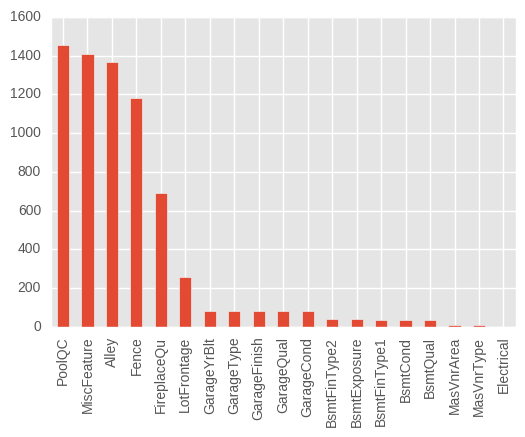

In [7]:
Train_explore.find_empty()

Excluding the columns as following: ['Id', 'SalePrice']
The numerical features are ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
The categorical features are: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',

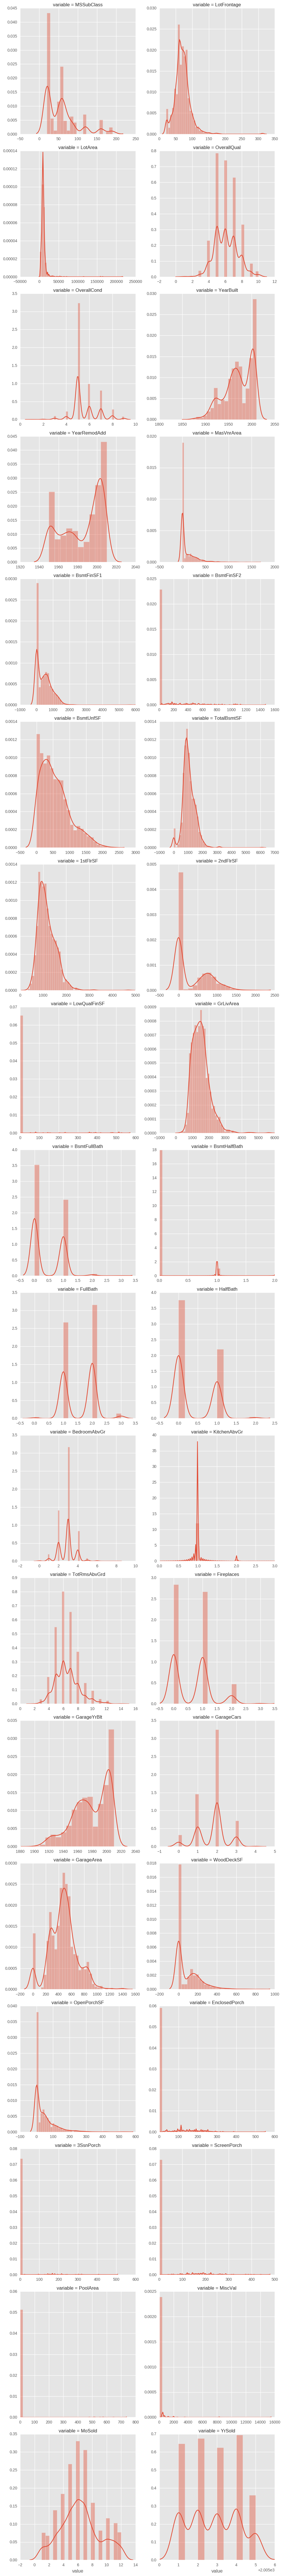

In [5]:
Train_explore.show_numerical(["Id", "SalePrice"])

__The Code Below will not WORK NOW, to explore the data, one can use standard Pandas, Numpy, or Scikit-Learn library__

From the data descriptions, there are many variables which have NaN that need to be considered as absence of the property.

In [ ]:
fill_dict = {"NoBsmt": ["BsmtFinType1", "BsmtCond", "BsmtFinType2", "BsmtExposure", "BsmtQual"],
             "NoGarage": ["GarageCond", "GarageQual", "GarageFinish", "GarageType"],
             "NoPool": ["PoolQC"],
             "NoFirePlace": ["FireplaceQu"],
             "NoFence":["Fence"],
             "NoAccess": ["Alley"],
             "None": ["MiscFeature", "MasVnrType"]
             }
data.fill_na_spec(fill_dict)

In the variables related to garage, there is one empty value in `GarageArea` and `GarageCars` when it has the `GarageType = Detchd`. So one can impute the missing value with the median value of the `GarateArea` when `GarageType = Detchd`. 

In [ ]:
print ("The GarageType is " + data.all_data.loc[data.all_data.GarageArea.isnull(),'GarageType'] + 
       ", when the Garage Area is empty")
group = {("GarageType", "Detchd"): ["GarageArea", "GarageCars"] }
data.fill_na_group(group)

For Basement areas, if there is no basement, the area should be zero. Similar issues apply Masonry veneer area, Garage area, Pool area, Fireplaces

In [ ]:
value_matching = {
    ("NoBsmt", 0): [("BsmtFinType1", "BsmtFinSF1"), ("BsmtFinType2", "BsmtFinSF2"), ("BsmtQual", "TotalBsmtSF"),
                    ("BsmtQual", "BsmtUnfSF")
                    ],
    ("None", 0):[("MasVnrType","MasVnrArea")],
    ("NoGarage", 0) : [("GarageType", "GarageCars"), ("GarageType", "GarageArea")],
    ("NoPool", 0): [("PoolQC", "PoolArea")],
    ("NoFirePlace", 0): [("FireplaceQu", "Fireplaces")]
}
mapping = {("None", 0): [("MiscFeature", "MiscVal")]}
data.convert_value(value_matching)
data.convert_value(mapping, True)

In [ ]:
# Now one can impute the missing variables with most common values
data.fill_na_gen()

It looks like mapping is way faster than apply funciton.

In [ ]:
interpret_mapping = {
    'MSSubClass': { 20: "SubClass_20",
                     30: "SubClass_30",
                     40: "SubClass_40",
                     45: "SubClass_45",
                     50: "SubClass_50",
                     60: "SubClass_60",
                     70: "SubClass_70",
                     75: "SubClass_75",
                     80: "SubClass_80",
                     85: "SubClass_85",
                     90: "SubClass_90",
                     120: "SubClass_120",
                     150: "SubClass_150",
                     160: "SubClass_160",
                     180: "SubClass_180",
                     190: "SubClass_190"},
    'Street': { 'Grvl' : 0,
                'Pave': 1},
    'Alley': { 'Grvl': 0,
               'Pave': 1,
               'NoAccess': -1},
    'LotShape': {'Reg' : 0,
                 'IR1' : 1,
                 'IR2' : 2,
                 'IR3' : 3 },
    'Utilities': {'AllPub': 3,
                  'NoSewr' : 2,
                  'NoSeWa': 1,
                  'ELO': 0},
    'LandSlope': {'Gtl' : 0,
                  'Mod' : 1,
                  'Sev' : 2},
    'ExterQual': {'Ex' : 5,
                  'Gd' : 4,
                  'TA' : 3,
                  'Fa' : 2,
                  'Po' : 1},
    'ExterCond': {'Ex' : 5,
                  'Gd' : 4,
                  'TA' : 3,
                  'FA' : 2,
                  'Po' : 1},
    'BsmtQual': {'Ex' : 5,
                 'Gd' : 4,
                 'TA' : 3,
                 'Fa' : 2,
                 'Po' : 1,
                 'NoBsmt' : 0},
    'BsmtCond': {'Ex' : 5,
                 'Gd' : 4,
                 'TA' : 3,
                 'Fa' : 2,
                 'Po' : 1,
                 'NoBsmt' : 0},
    'BsmtExposure' : {'Gd' : 3,
                      'Av' : 2,
                      'Mn' : 1,
                      'No' : 0,
                      'NoBsmt' : 0},
    'HeatingQC' :{'Ex' : 5,
                  'Gd' : 4,
                  'TA' : 3,
                  'Fa' : 2,
                  'Po' : 1},
    'CentralAir' :{'N' : 0,
                   'Y' : 1},
    'KitchenQual' :{'Ex' : 5,
                    'Gd' : 4,
                    'TA' : 3,
                    'Fa' : 2,
                    'Po' : 1},
    'Functional' : {'Typ' : 0,
                    'Min1' : 1,
                    'Min2' : 1,
                    'Mod' : 2,
                    'Maj1' : 3,
                    'Maj2' : 3,
                    'Sev' : 4,
                    'Sal' : 5},
    'FireplaceQu' : {'Ex' : 5,
                     'Gd' : 4,
                     'TA' : 3,
                     'Fa' : 2,
                     'Po' : 1,
                     },
    'GarageFinish' : {'Fin' : 2,
                      'RFn' : 1,
                      'Unf' : 0,
                      'NoGarage': 0},
    'GarageQual' : {'Ex' : 5,
                    'Gd' : 4,
                    'TA' : 3,
                    'Fa' : 2,
                    'Po' : 1,
                    'NoGarage': 0},
    'GarageCond' : {'Ex': 5,
                    'Gd' : 4,
                    'TA' : 3,
                    'Fa' : 2,
                    'Po' : 1,
                    'NoGarage' : 0},
    'PavedDrive' : {'Y' : 2,
                    'P' : 1,
                    'N' : 0},
      'PoolQC': {'Ex' : 4,
                 'Gd' : 3,
                 'TA' : 2,
                 'Fa' : 1,
                 'NoPool': 0},
      'Fence': {'GdPrv': 2,
                'MnPrv': 1,
                'GdWo': 2,
                'MnWw': 1,
                'NoFence': 0
                },
}
data.interpret_value(interpret_mapping)

# Remove Skew from Price values
After exploring the distribution of the price values, we can take the logarithm to change the shape of the variable to reduce the skewness of the variables.

In [ ]:
X_train = data.all_data[:data.train.shape[0]]
y = data.train['SalePrice']
X = pd.concat((X_train, y), axis = 1)
X.drop("Id", axis=1, inplace=True)

In [ ]:
corr = X.select_dtypes(include = ["float64", "int64"]).corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, vmax=1, square=True)

In [ ]:
cor_dict = corr['SalePrice'].to_dict()
del cor_dict["SalePrice"]
print("List the numerical features decendingly by their correlation with Sale Price:\n")
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t{1}".format(*ele))

In [ ]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(X, figsize=(12,12), diagonal="kde")

In [ ]:
sns.regplot(x = "PoolQC", y = 'PoolArea', data=X, color= "Orange")

In [ ]:
sns.regplot(x = "TotRmsAbvGrd", y = "GrLivArea", data=X, color= "Red")

In [ ]:
sns.regplot( x = "GarageCond", y = "GarageQual", data=X, color = "Blue")

In [ ]:
sns.regplot( x = "GarageCars", y = "GarageArea", data = X, color = "Green")

In [ ]:
total = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
plt.scatter(total, X["TotalBsmtSF"])

In [ ]:
data.save_dataset("test_data.p")

In [ ]:
X_train, X_test, y = cleaner.prep_for_learn()
print(X_train.shape)
print(y.shape)
print(X_test.shape)

In [ ]:
y = np.log1p(y)

In [ ]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

def rmsle(y, y_pred):
     return np.sqrt((( (np.log1p(y_pred*price_scale)- np.log1p(y*price_scale)) )**2).mean())

# scorer = make_scorer(rmsle, False)
scorer = make_scorer(mean_squared_error, False)

def rmse_cv(model, X, y):
     return (cross_val_score(model, X, y, scoring=scorer)).mean()

In [ ]:
from sklearn.linear_model import Lasso
alphas = [1e-4, 5e-4, 1e-3, 5e-3]
cv_lasso = [rmse_cv(Lasso(alpha = alpha, max_iter=50000), X_train, y) for alpha in alphas]
pd.Series(cv_lasso, index = alphas).plot()

In [ ]:
model = Lasso(alpha = 5e-4, max_iter =  50000).fit(X_train, y)

In [ ]:
coef = pd.Series(model.coef_, index = X_train.columns).sort_values()
imp_coef = pd.concat([coef.head(10), coef.tail(10)])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Model")

In [ ]:
p_pred = np.expm1(model.predict(X_train))
plt.scatter(p_pred, np.expm1(y))
plt.plot([min(p_pred),max(p_pred)], [min(p_pred),max(p_pred)], c="red")

In [ ]:
# save to file to make a submission
p = np.expm1(model.predict(X_test))
solution = pd.DataFrame({"id":test_data.Id, "SalePrice":p}, columns=['id', 'SalePrice'])
solution.to_csv("test.csv", index = False)

In [ ]:
import seaborn as sns
price = train_data[train_data.columns.values[-1]]
log_price = np.log(price)
print ("The skewness of the price is {0}".format(skew(price)))

plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
sns.distplot(price, color = 'r', hist_kws = {'alpha': 0.9})
plt.title('Original Data')
plt.xlabel('Sale Price')

plt.subplot(1,2,2)
sns.distplot(log_price, color = 'r', hist_kws = {'alpha': 0.9})
plt.title('Natual log of Data')
plt.xlabel('Natual log of Sale Price')
plt.tight_layout()

# Handling missing values for numerical variables
* Remove outliers using Median Absolute Deviation
* Calculate skewness of each variable and transform it if greater than 0.75
* Apply the sklearn.Normalizer to each column

  We can compare two different numerical variables: one with skewness handling and normalization, one without it.

In [ ]:
train_num_m = train_data.select_dtypes(include = ['float64', 'int64']).iloc[:,1:]
train_num = train_data.select_dtypes(include = ['float64', 'int64']).iloc[:,1:]
for col in train_num_m.columns.values:
    if np.sum(train_num_m[col].isnull() ) > 0:
        median = train_num_m[col].median()
        idx = np.where(train_num_m.isnull())[0]
        train_num_m[col].iloc[idx] = median
        train_num[col].iloc[idx] = median
        
        outliers = np.where(is_outlier(train_num_m[col]))
        train_num_m[col].iloc[outliers] = median
        
        if skew(train_num_m[col]) > 0.75:
            train_num_m[col] = np.log(train_num[col])
            train_num_m[col] = train_num_m[col].apply(lambda x: 0 if x == -np.inf else x)
            
        train_num_m[col] = Normalizer().fit_transform(train_num_m[col].reshape(1,-1))[0]

In [ ]:
train_num_m[train_num_m.columns.values[-1]] = np.log(train_num_m[train_num_m.columns.values[-1]])
corr_m = train_num_m.corr()
corr = train_num.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr_m, vmax =1 , square = True)
plt.figure(figsize = (15,15))
sns.heatmap(corr, vmax=1, square = True)

In [ ]:
cor_dict_m = corr_m['SalePrice'].to_dict()
del cor_dict_m['SalePrice']

# raw numerical features
cor_dict = corr["SalePrice"].to_dict()
del cor_dict['SalePrice']

print("The raw numerical features sorted by their correlation with Sale price:\n")
for item in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t {1}".format(*item))

print("\n\nThe modified numerical features sorted by their correlation with Sale price:\n")
for item in sorted(cor_dict_m.items(), key = lambda x: -abs(x[1])):
    print("{0}: \t {1}".format(*item))

In [ ]:
sns.regplot(x='OverallQual', y='SalePrice', data = train_num_m, color='Orange')

In [ ]:
fig = plt.figure()
plt.scatter(train_num_m.YearBuilt.values, train_num_m.YearRemodAdd.values)
plt.title("Year Built")
fig.text(-0.01,0.5, 'Year Remodel Added', va="center", rotation = 'vertical', fontsize = 12)
print (corr_m['YearBuilt']['YearRemodAdd'])

In [ ]:
plt.figure(figsize = (10, 5))
plt.subplot(1,2,1)
plt.scatter(train_num_m.GarageCars.values, train_num_m.GarageArea.values)
plt.title("Size of Garage for Cars")
fig.text(-0.01,0.5, 'Size of Garage area', va="center", rotation = 'vertical', fontsize = 12)
print(corr_m['GarageCars']['GarageArea'])
plt.subplot(1,2,2)
sns.regplot(x='GarageCars', y='GarageArea', data = train_num_m, color='Orange')

In [ ]:
fig = plt.figure()
plt.scatter(train_num_m.GarageArea.values, train_num_m.GarageYrBlt.values)
plt.title("Size of Garage")
fig.text(-0.01,0.5, 'The building year for garage', va="center", rotation = 'vertical', fontsize = 12)
print(corr_m['GarageArea']['GarageYrBlt'])

In [ ]:
fig = plt.figure()
plt.scatter(train_num_m.YearBuilt.values, train_num_m.GarageYrBlt.values)
plt.title("Year Built")
fig.text(-0.01,0.5, 'The year build the garage', va="center", rotation = 'vertical', fontsize = 12)
print(corr_m['YearBuilt']['GarageYrBlt'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Campare the importances of RF for raw and modified features
rfr = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
y = train_num['SalePrice']
X= train_num.drop('SalePrice', axis=1)

rfr.fit(X,y)
coef = pd.Series(rfr.feature_importances_, index = X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
coef.head(25).plot(kind='bar')
plt.title('Raw Feature Significance for random forest')
plt.tight_layout()

rfr_m = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
y_m = train_num_m['SalePrice']
X_m= train_num_m.drop('SalePrice', axis=1)

rfr_m.fit(X_m,y_m)
coef_m = pd.Series(rfr_m.feature_importances_, index = X_m.columns).sort_values(ascending=False)

plt.subplot(1,2,2)
coef_m.head(25).plot(kind='bar')
plt.title('Modified Feature Significance for random forest')
plt.tight_layout()

In [ ]:
gbr = GradientBoostingRegressor(loss='ls', n_estimators=1000)
gbr.fit(X,y)
coef = pd.Series(gbr.feature_importances_, index = X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
coef.head(25).plot(kind='bar')
plt.title('Raw Feature Significance for gradient boosting trees')
plt.tight_layout()

gbr_m = GradientBoostingRegressor(loss='ls', n_estimators=1000)
y_m = train_num_m['SalePrice']
X_m= train_num_m.drop('SalePrice', axis=1)

gbr_m.fit(X_m,y_m)
coef_m = pd.Series(gbr_m.feature_importances_, index = X_m.columns).sort_values(ascending=False)

plt.subplot(1,2,2)
coef_m.head(25).plot(kind='bar')
plt.title('Modified Feature Significance for gradient boosting trees')
plt.tight_layout()

In [ ]:
_,pval = f_regression(X, y)
coef = pd.Series(pval, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
coef.head(25).plot(kind='bar')
plt.title('Raw Feature Significance')
plt.tight_layout()

_,pval_m = f_regression(X_m, y)
coef_m = pd.Series(pval_m, index=X_m.columns).sort_values(ascending=True)

plt.subplot(1,2,2) 
coef_m.head(25).plot(kind='bar')
plt.title('Modified Feature Significance')
plt.tight_layout()

# Categorical Variables

In [ ]:
cat_value = train_data.select_dtypes(include=['object']).iloc[:,1:]

In [ ]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = train_data)
xt = plt.xticks(rotation = 45)

In [ ]:
plt.figure (figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = cat_value)
xt = plt.xticks(rotation = 45)